In [64]:
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import accuracy_score as ac

In [65]:
df = pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [66]:
df["Type"].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [67]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]
X

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Perform PCA

In [68]:
X_norm=scale(X)
X_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [69]:
model = PCA()
pca=model.fit_transform(X_norm)
pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [70]:
pcaVar = model.explained_variance_ratio_
pcaVar

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [71]:
cvar=np.cumsum(pcaVar)
cvar

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

Text(0.5, 1.0, 'Scree plot')

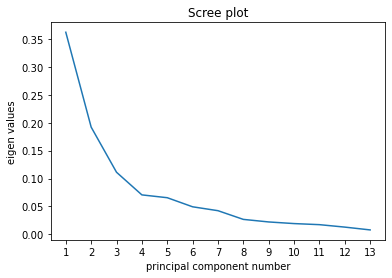

In [124]:
plt.plot(range(1,len(pcaVar)+1),pcaVar)
plt.xticks(range(1,len(pcaVar)+1))
plt.xlabel("principal component number")
plt.ylabel("eigen values")
plt.title("Scree plot")

# Final dataframe

In [73]:
df_new=pd.DataFrame(pca[:,0:3])
df_new.rename(mapper={0:'pca1',1:'pca2',2:'pca3'},axis=1)

,pca1,pca2,pca3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


# Using k-means

In [89]:
model = KMeans(n_clusters=3)
model.fit_transform(df_new)
lbl = model.predict(df_new)
lbl

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [90]:
lbl_new=[]
for val in lbl:
    if val==2:
        lbl_new.append(1)
    elif val ==0:
        lbl_new.append(2)
    else:
        lbl_new.append(3)
ac(Y,lbl_new)

0.9606741573033708

Accuracy with 3 cluster, k means is as above

In [75]:
y_pred=model.predict(df_new)

In [94]:
# inertia score
noc = [i for i in range(1,6)]
inertia = []
for c in noc:
    model = KMeans(n_clusters=c)
    model.fit_transform(df_new)
    inertia.append(model.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Inertia Score')

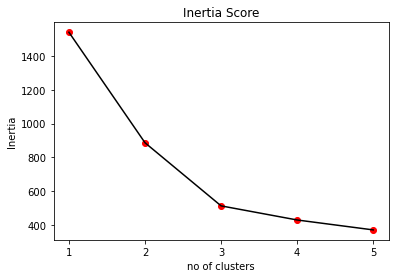

In [95]:
plt.plot(noc,inertia,color="black")
plt.scatter(noc,inertia,color="red")
plt.xticks(noc)
plt.xlabel("no of clusters")
plt.ylabel("Inertia")
plt.title("Inertia Score")

In [78]:
(inertia[0]-inertia[1])>(inertia[1]-inertia[2])

True

From inertia we see 2 as optimum number of clusters

In [96]:
# silhouette score
from sklearn.metrics import silhouette_score as shs

In [113]:
noc = [i for i in range(2,6)]
sh = []
for c in noc:
    model = KMeans(n_clusters=c)
    model.fit_transform(df_new)
    lbl = model.predict(df_new)
    sh.append(shs(df_new,labels=lbl))

Text(0.5, 1.0, 'Silhouette Score')

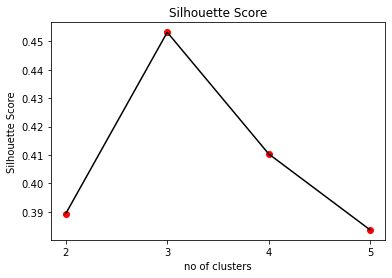

In [114]:
plt.plot(noc,sh,color="black")
plt.scatter(noc,sh,color="red")
plt.xticks(noc)
plt.xlabel("no of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")

From silhouette score we see 3 as optimum number of clusters

In [99]:
# c-h score
from sklearn.metrics import calinski_harabasz_score as chs

In [115]:
noc = [i for i in range(2,6)]
ch = []
for c in noc:
    model = KMeans(n_clusters=c)
    model.fit_transform(df_new)
    lbl = model.predict(df_new)
    ch.append(shs(df_new,labels=lbl))

Text(0.5, 1.0, 'C-H Score')

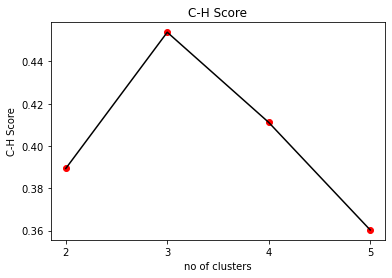

In [116]:
plt.plot(noc,ch,color="black")
plt.scatter(noc,ch,color="red")
plt.xticks(noc)
plt.xlabel("no of clusters")
plt.ylabel("C-H Score")
plt.title("C-H Score")

From c-h score we see 3 as optimum number of clusters

# Using hierarchial clustering

In [102]:
model = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
model.fit(df_new)
lbl = model.fit_predict(df_new)
lbl

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [103]:
lbl_new=[]
for val in lbl:
    if val==0:
        lbl_new.append(1)
    elif val ==1:
        lbl_new.append(3)
    else:
        lbl_new.append(2)
ac(Y,lbl_new)

0.7134831460674157

Accuracy with 3 cluster, hierarchial clustering is as above

In [122]:
# silhouette score
sh=[]
noc=[i for i in range(2,6)]
for c in noc:
    model = AgglomerativeClustering(n_clusters=c,affinity='euclidean',linkage='complete')
    lbl = model.fit_predict(df_new)
    sh.append(shs(df_new,labels=lbl))

Text(0.5, 1.0, 'Silhouette Score')

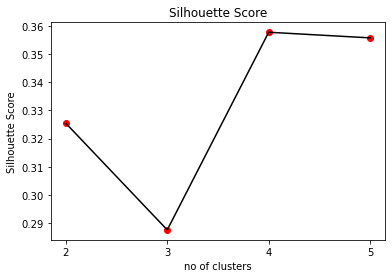

In [123]:
plt.plot(noc,sh,color="black")
plt.scatter(noc,sh,color="red")
plt.xticks(noc)
plt.xlabel("no of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")

From silhouette score we see 4 as optimum number of clusters

In [120]:
# c-h score
ch=[]
noc=[i for i in range(2,6)]
for c in noc:
    model = AgglomerativeClustering(n_clusters=c,affinity='euclidean',linkage='complete')
    lbl = model.fit_predict(df_new)
    ch.append(chs(df_new,labels=lbl))

Text(0.5, 1.0, 'C-H Score')

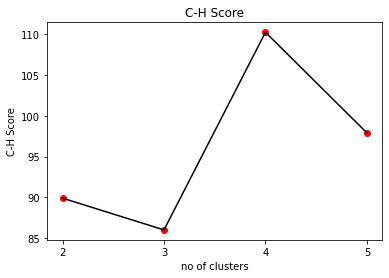

In [121]:
plt.plot(noc,ch,color="black")
plt.scatter(noc,ch,color="red")
plt.xticks(noc)
plt.xlabel("no of clusters")
plt.ylabel("C-H Score")
plt.title("C-H Score")

From c-h score we see 4 as optimum number of clusters

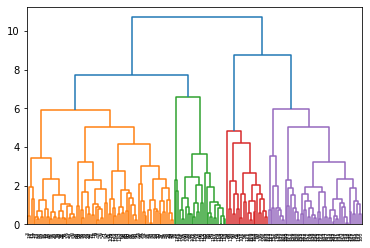

In [55]:
dendro=sch.dendrogram(sch.linkage(df_new,method='complete',metric='euclidean'))

# Hence we see that k means on first 3 principal components gives almost the same kind of clusters(3) as the first column in given data